Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
# preprocessing --> remove date --> replace 0 values with mean value --> 
gold_data = pd.read_csv('gld_price_data.csv')
gold_data = gold_data.drop('Date', axis=1)
mean_values = gold_data.mean()
gold_data = gold_data.replace(0, mean_values)
gold_data.sort_values("GLD", inplace = True)
gold_data.drop_duplicates(keep = "first", inplace = True)

In [3]:
gold_data.head()

,SPX,GLD,USO,SLV,EUR/USD
175,852.299988,70.000000,45.750000,9.17,1.245904
162,908.109985,70.650002,56.599998,9.38,1.262993
168,966.299988,71.099998,52.490002,9.62,1.261798
167,968.750000,71.339996,55.590000,9.58,1.270196
161,896.780029,71.709999,54.930000,9.45,1.294498


In [4]:
gold_data.tail()

,SPX,GLD,USO,SLV,EUR/USD
807,1172.869995,178.539993,34.849998,39.869999,1.368607
800,1212.920044,179.100006,34.439999,40.400002,1.443314
805,1185.900024,181.809998,34.459999,41.220001,1.390414
803,1165.239990,182.899994,33.590000,41.049999,1.400325
795,1123.819946,184.589996,32.720001,42.630001,1.436101


In [5]:
print(gold_data.shape)

gold_data.isnull().sum()

(2290, 5)


SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2290 entries, 175 to 795
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 107.3 KB


In [7]:
gold_data.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [9]:
correlation = gold_data.corr()

<Axes: >

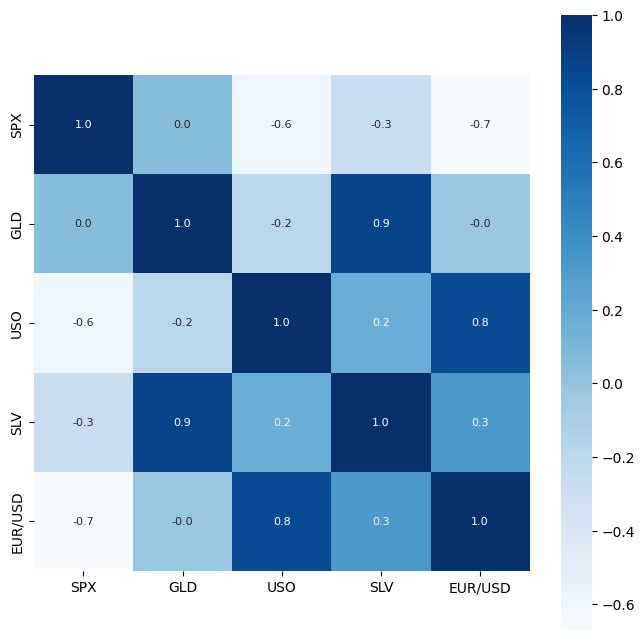

In [10]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\ahgh2\AppData\Local\Temp\ipykernel_4404\563101706.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

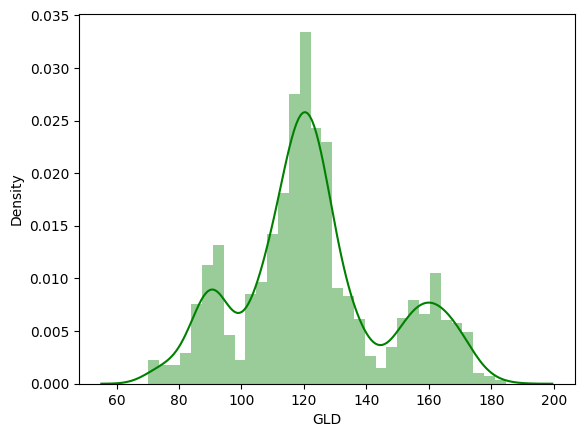

In [12]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [13]:
X = gold_data.drop(['GLD'],axis=1)
Y = gold_data['GLD']

In [14]:
print(X)

             SPX        USO        SLV   EUR/USD
175   852.299988  45.750000   9.170000  1.245904
162   908.109985  56.599998   9.380000  1.262993
168   966.299988  52.490002   9.620000  1.261798
167   968.750000  55.590000   9.580000  1.270196
161   896.780029  54.930000   9.450000  1.294498
..           ...        ...        ...       ...
807  1172.869995  34.849998  39.869999  1.368607
800  1212.920044  34.439999  40.400002  1.443314
805  1185.900024  34.459999  41.220001  1.390414
803  1165.239990  33.590000  41.049999  1.400325
795  1123.819946  32.720001  42.630001  1.436101

[2290 rows x 4 columns]


In [15]:
print(Y)

175     70.000000
162     70.650002
168     71.099998
167     71.339996
161     71.709999
          ...    
807    178.539993
800    179.100006
805    181.809998
803    182.899994
795    184.589996
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[123.62909999  88.53550041 137.50210093 154.48469859 156.87150061
 118.75999968 115.33200031 161.9949024  126.22360074 125.33749915
 127.77130124 115.63729976 123.79400001 117.9047007  127.09860259
 160.71779903 112.65519963 115.27860011 118.40130012 117.79569996
 120.23740191 121.8778998  115.93900117 113.31139991 166.55590231
  98.29290227  87.74939994 121.74149979 126.09959991 120.69860025
  93.16809944 169.63530015  87.78010001 146.97660045 107.99669943
 114.40810022 126.76100077 132.82120229 113.10200007 137.8087026
 104.27139937  87.31339849 172.9653994  108.88709995 117.41960051
 123.82900021 131.83120265 131.98069856  83.88399953 124.91260027
  89.52309942 127.1824998  152.71000265 131.73249937 162.13489817
 121.36070051 120.39370204 114.5211001  115.16430046  81.69320012
  82.39139957  85.91389936  92.85049865 167.48129905 170.64300068
 122.0177998  118.199701   166.70469939 124.29499984  96.93610134
 115.31759967 113.13679873 111.0891986  110.36999833 125.69629946
 122.942299

In [21]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9895625737188614


Compare the Actual Values and Predicted Values in a Plot

In [22]:
Y_test = list(Y_test)

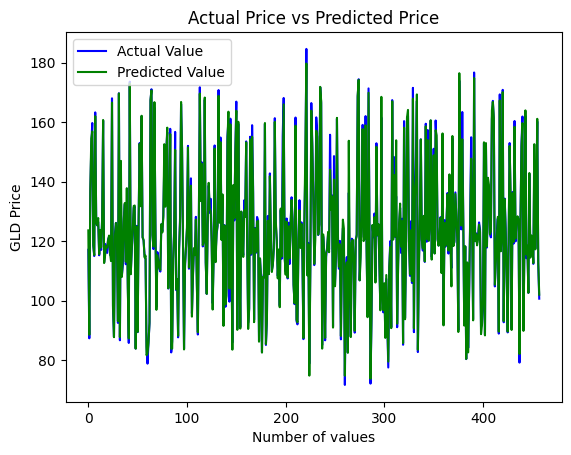

In [23]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()